# Simulate a transcriptome with TE transcripts using polyester

1. Generate transcriptome, index it, and simulate reads ([see code](./make_l1hs_chr22_txome.py))
 - Spliced and unspliced transcripts from GENCODE annotation
 - L1 transcripts from full-length L1HS annotations in reference genome

2. Quantify reads with salmon
 - build index of transcriptome (use same transcriptome from step 1)
 - quantify reads with salmon

3. Compare with original count matrix

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.bench import BenchmarkSalmon

In [2]:
# SIMULATION 1: uniform FPKM, hold all transcripts constant across samples, only increase L1HS expression
bm = BenchmarkSalmon(
    reads_dir="../resources/chr22_l1hs_txome/sim_reads_1",
    txome_dir="../resources/chr22_l1hs_txome",
    outdir="../resources/chr22_l1hs_txome/sim_reads_1_salmon",
)
# bm.index()
bm.quant()
benchmark = bm.read_counts()

[INFO:src.bench: 11-01 21:35:29] - Running Salmon quant for sample_01
[INFO:src.bench: 11-01 21:36:27] - Running Salmon quant for sample_02
[INFO:src.bench: 11-01 21:37:23] - Running Salmon quant for sample_03
[INFO:src.bench: 11-01 21:38:19] - Running Salmon quant for sample_04
[INFO:src.bench: 11-01 21:39:16] - Running Salmon quant for sample_05
[INFO:src.bench: 11-01 21:40:12] - Running Salmon quant for sample_06
/netapp/LOG-G4/jfaybishenko/bulk_te_bench/.conda/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


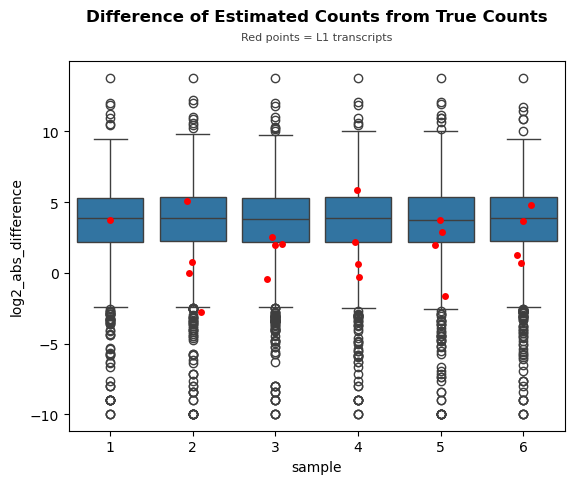

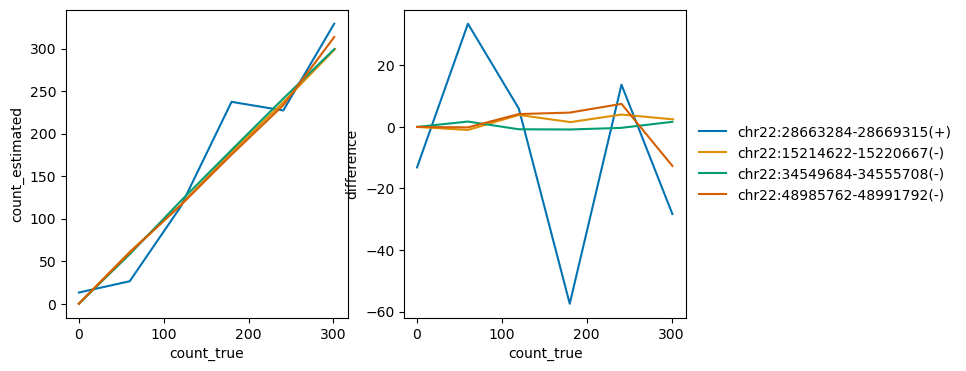

In [3]:
bm.plot_difference()
bm.plot_l1hs()

In [4]:
#   SIMULATION 2: non-uniform in L1 only, constant in gene transcripts
bm = BenchmarkSalmon(
    reads_dir="../resources/chr22_l1hs_txome/sim_reads_2",
    txome_dir="../resources/chr22_l1hs_txome",
    outdir="../resources/chr22_l1hs_txome/sim_reads_2_salmon",
)
# bm.index()
bm.quant()
benchmark = bm.read_counts()

[INFO:src.bench: 11-01 21:41:21] - Running Salmon quant for sample_01
[INFO:src.bench: 11-01 21:42:16] - Running Salmon quant for sample_02
[INFO:src.bench: 11-01 21:43:14] - Running Salmon quant for sample_03
[INFO:src.bench: 11-01 21:44:09] - Running Salmon quant for sample_04
[INFO:src.bench: 11-01 21:45:07] - Running Salmon quant for sample_05
[INFO:src.bench: 11-01 21:46:05] - Running Salmon quant for sample_06
/netapp/LOG-G4/jfaybishenko/bulk_te_bench/.conda/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


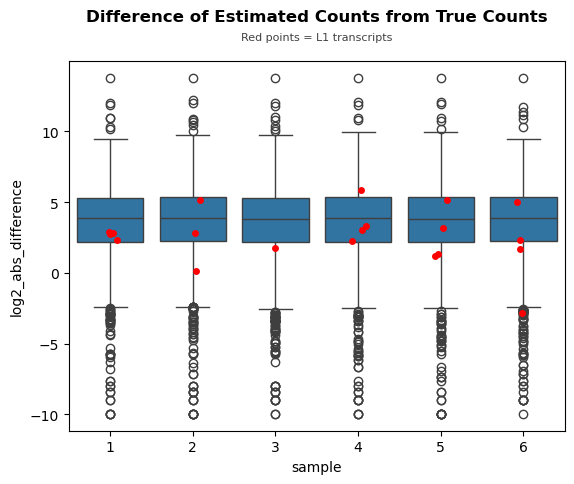

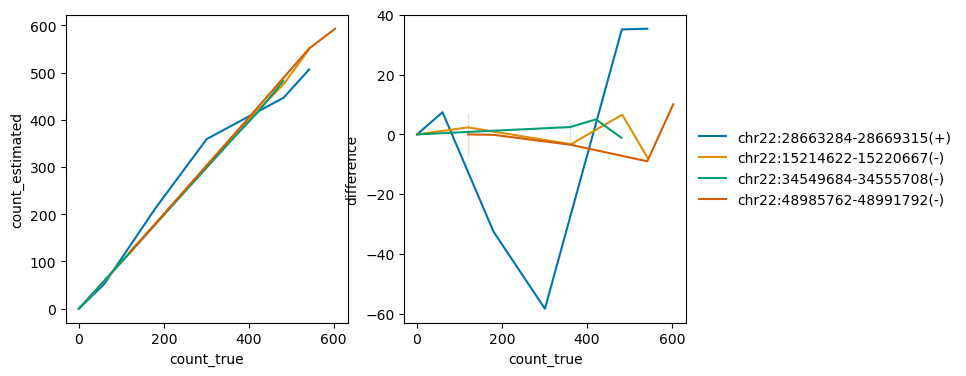

In [5]:
bm.plot_difference()
bm.plot_l1hs()

In [3]:
#   SIMULATION 3:  non-uniform in gene only and L1
bm = BenchmarkSalmon(
    reads_dir="../resources/chr22_l1hs_txome/sim_reads_3",
    txome_dir="../resources/chr22_l1hs_txome",
    outdir="../resources/chr22_l1hs_txome/sim_reads_3_salmon",
)
# bm.index()
bm.quant()
benchmark = bm.read_counts()

[INFO:src.bench: 11-02 17:42:39] - Running Salmon quant for sample_01
[INFO:src.bench: 11-02 17:43:15] - Running Salmon quant for sample_02
[INFO:src.bench: 11-02 17:43:49] - Running Salmon quant for sample_03
[INFO:src.bench: 11-02 17:44:23] - Running Salmon quant for sample_04
[INFO:src.bench: 11-02 17:44:57] - Running Salmon quant for sample_05
[INFO:src.bench: 11-02 17:45:32] - Running Salmon quant for sample_06
/netapp/LOG-G4/jfaybishenko/bulk_te_bench/.conda/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


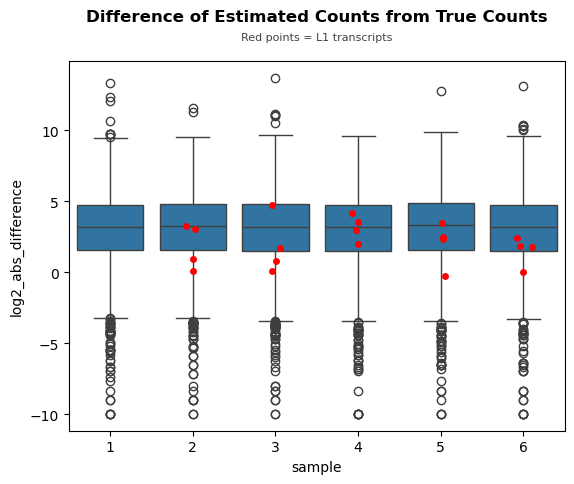

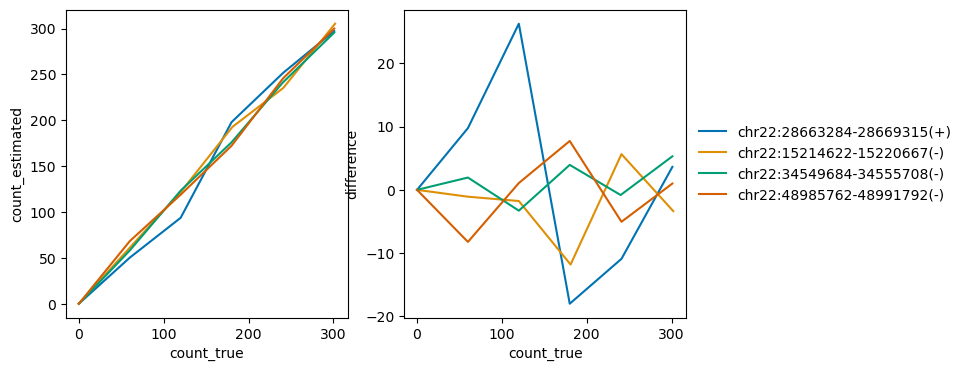

In [4]:
bm.plot_difference()
bm.plot_l1hs()

In [2]:
# SIMULATION 4: non-uniform in gene only, constant in L1
bm = BenchmarkSalmon(
    reads_dir="../resources/chr22_l1hs_txome/sim_reads_4",
    txome_dir="../resources/chr22_l1hs_txome",
    outdir="../resources/chr22_l1hs_txome/sim_reads_4_salmon",
)
# bm.index()
bm.quant()
benchmark = bm.read_counts()

Indexing transcriptome with salmon: salmon index -t ../resources/chr22_l1hs_txome/txome.fa -i ../resources/chr22_l1hs_txome/sim_reads_4_salmon/salmon_index -k 31  > ../resources/chr22_l1hs_txome/sim_reads_4_salmon/salmon_index.log 2>&1


[INFO:src.bench: 11-02 17:37:37] - Running Salmon quant for sample_01
[INFO:src.bench: 11-02 17:38:12] - Running Salmon quant for sample_02
[INFO:src.bench: 11-02 17:38:45] - Running Salmon quant for sample_03
[INFO:src.bench: 11-02 17:39:20] - Running Salmon quant for sample_04
[INFO:src.bench: 11-02 17:39:52] - Running Salmon quant for sample_05
[INFO:src.bench: 11-02 17:40:28] - Running Salmon quant for sample_06


In [1]:
bm.plot_difference()
bm.plot_l1hs()

NameError: name 'bm' is not defined

In [ ]:
# SIMULATION 5: realistic counts using gtex data
bm = BenchmarkSalmon(
    reads_dir="../resources/chr22_l1hs_txome/sim_reads_5",
    txome_dir="../resources/chr22_l1hs_txome",
    outdir="../resources/chr22_l1hs_txome/sim_reads_5_salmon",
)

bm.index()
bm.quant()
benchmark = bm.read_counts()

In [ ]:
bm.plot_difference()
bm.plot_l1hs()

## Next steps:

1. How does this compare to TEtranscripts, SQuIRE, and L1EM??
	- add each program to conda environment
	- write subclass in `src/bench.py` to run each program 
2. Simulate reads with non-uniform distributions in L1 only. Choose different number for each L1 in each sample. Add to `make_l1hs_chr22_txome.py` script.
3. Simulate reads with non-uniform distributions in non-L1, constant L1. Add to `make_l1hs_chr22_txome.py` script.

	To generate a more realistic simulation, see Salmon Paper methods on Polyester simulations https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5600148/

4. Try different salmon indexing (-k) and quantification parameters (e.g. --seqBias, --gcBias, --posBias)
5. Inspect intermediate results of salmon (where are L1 reads mapping?)